# Importing libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [4]:
labels = []
paths = []
for dirname,_,filenames in os.walk('C:\\ML\\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label)
    if len(paths)==1400:
        break
print('dataset loaded')

dataset loaded


In [5]:
len(paths)

1400

In [6]:
len(labels)

1400

In [7]:
paths[:5]

['C:\\ML\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\ML\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\ML\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\ML\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\ML\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [8]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [9]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\ML\TESS Toronto emotional speech set data\T...,angry
1,C:\ML\TESS Toronto emotional speech set data\T...,angry
2,C:\ML\TESS Toronto emotional speech set data\T...,angry
3,C:\ML\TESS Toronto emotional speech set data\T...,angry
4,C:\ML\TESS Toronto emotional speech set data\T...,angry


# Explory Data Analysis

In [11]:
df['label'].value_counts()

angry      200
disgust    200
fear       200
happy      200
neutral    200
ps         200
sad        200
Name: label, dtype: int64

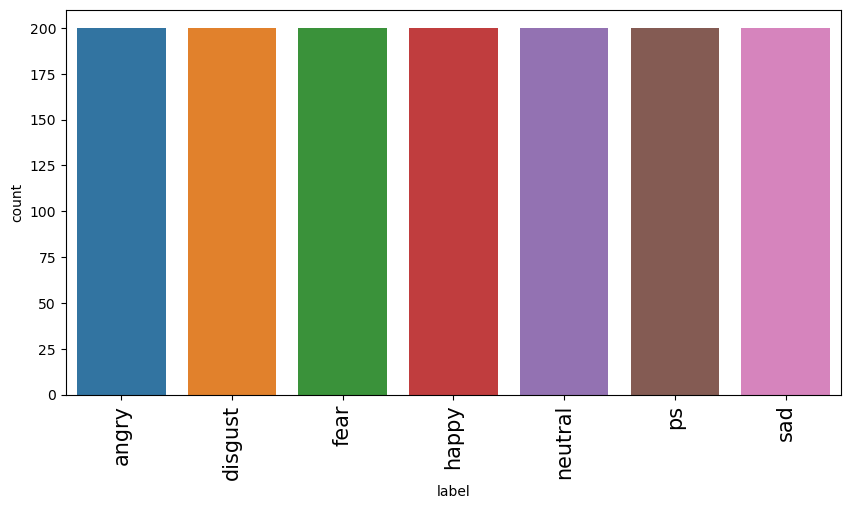

In [12]:
plt.figure(figsize = (10,5))
sns.countplot(df['label'])
plt.xticks(rotation=90,size =15)
plt.show()

In [13]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()



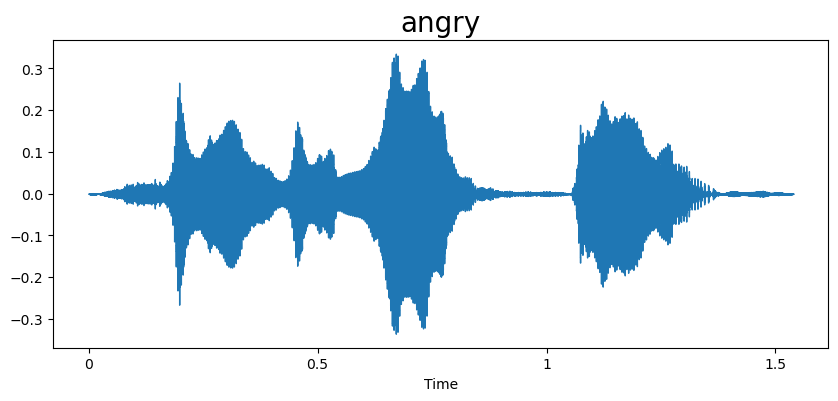

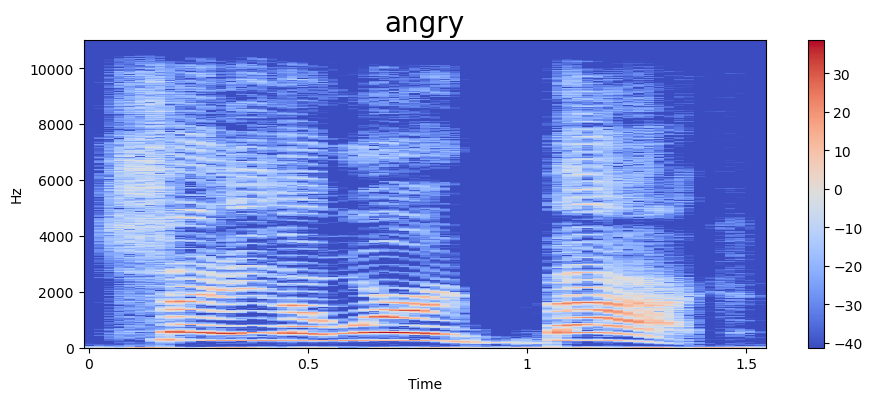

In [14]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


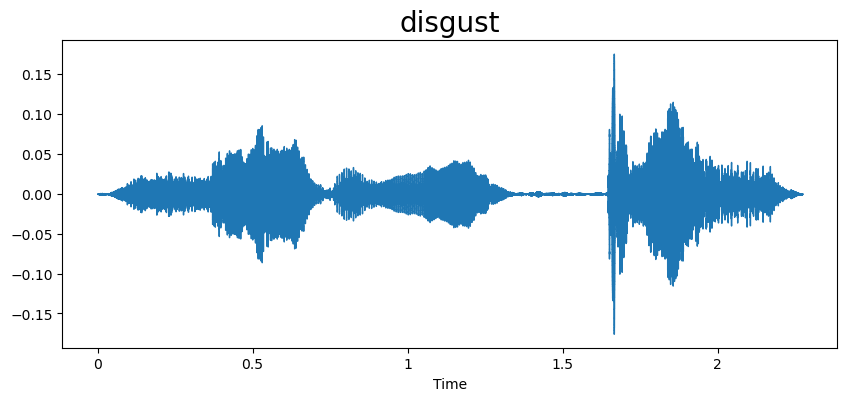

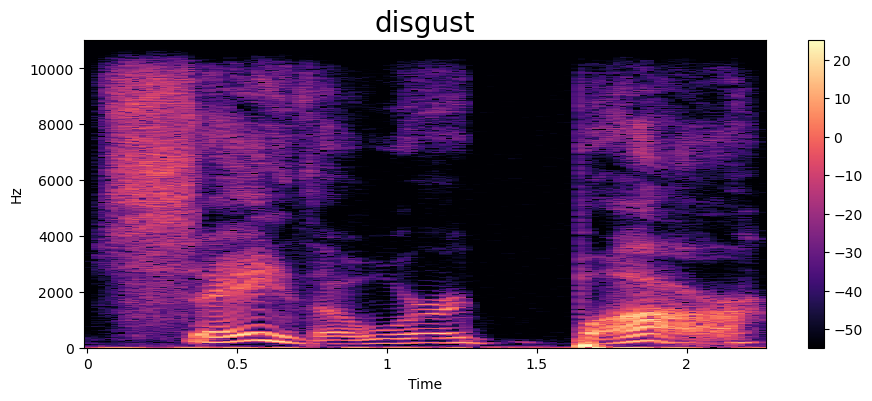

In [15]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


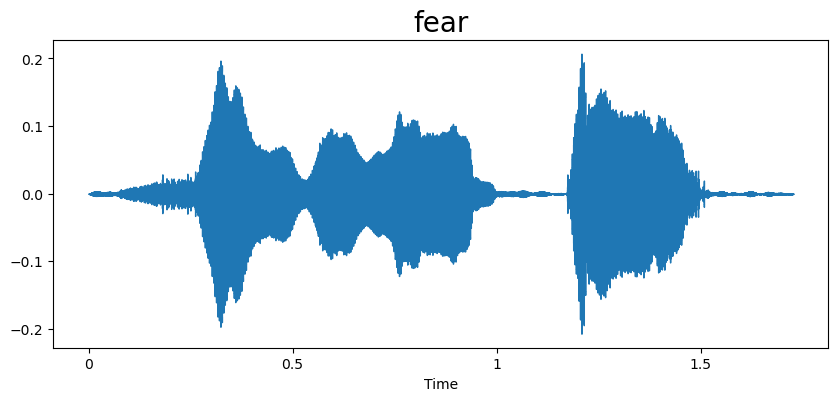

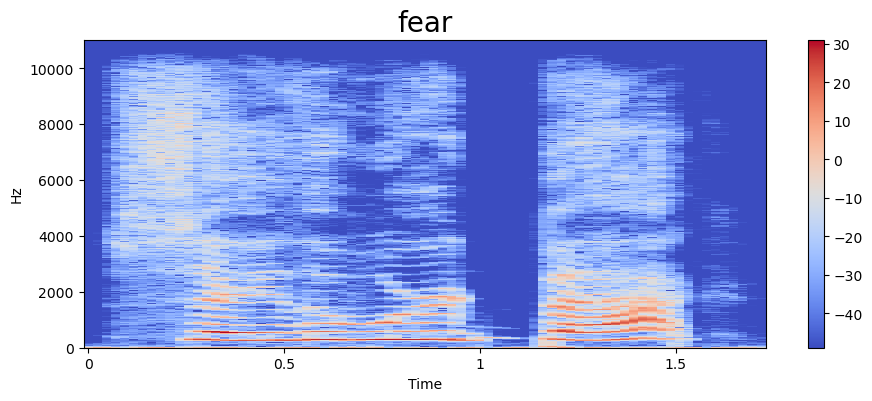

In [16]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


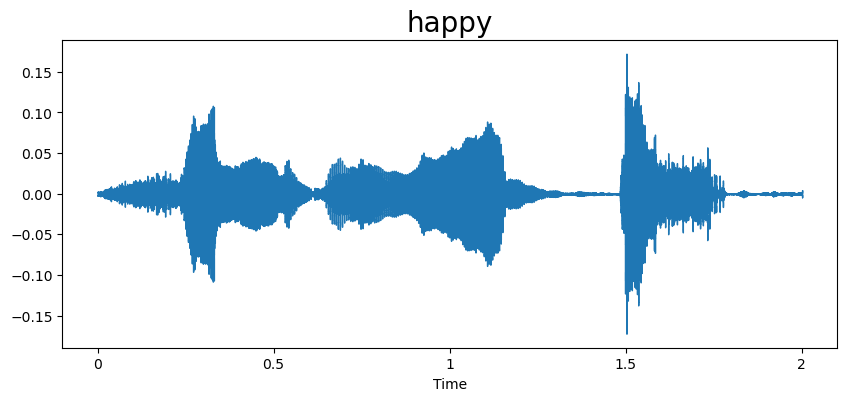

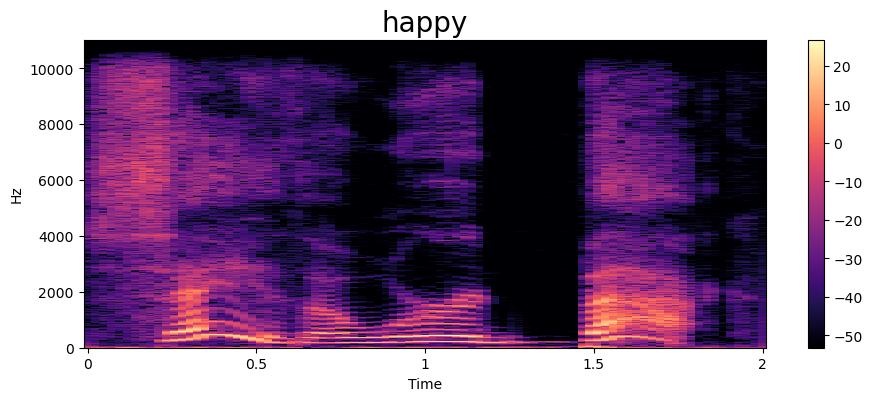

In [17]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


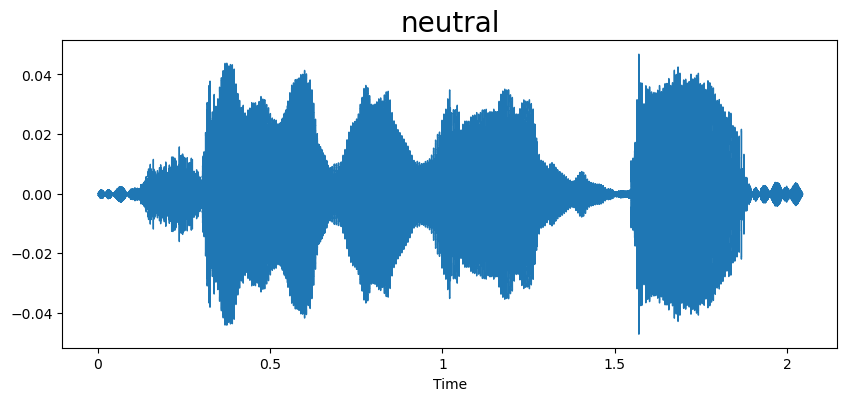

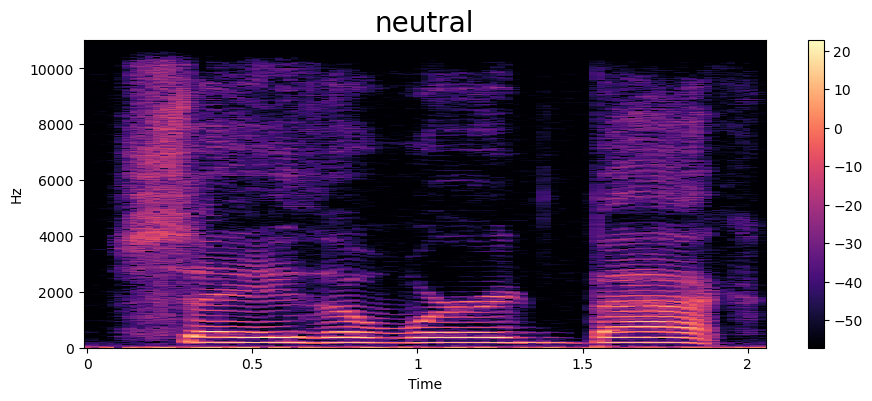

In [18]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


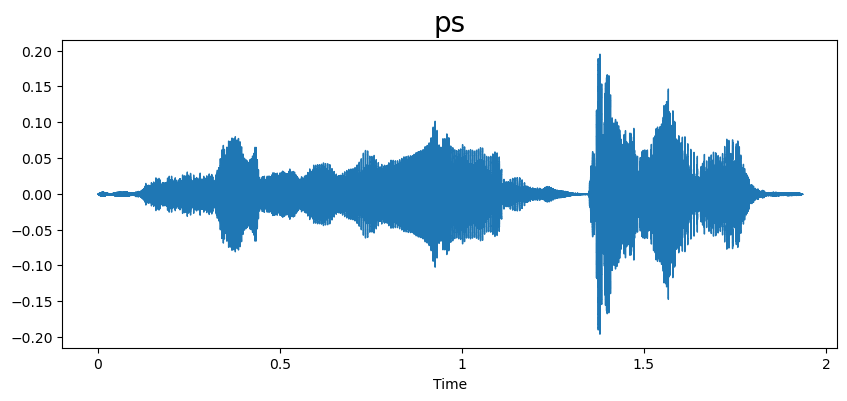

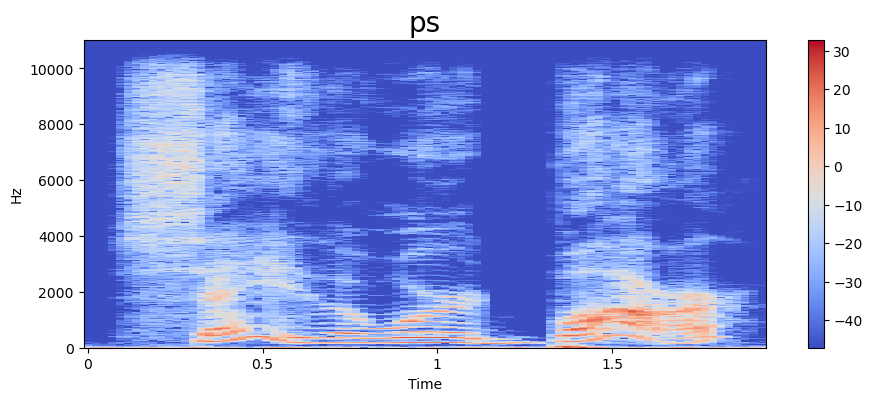

In [19]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


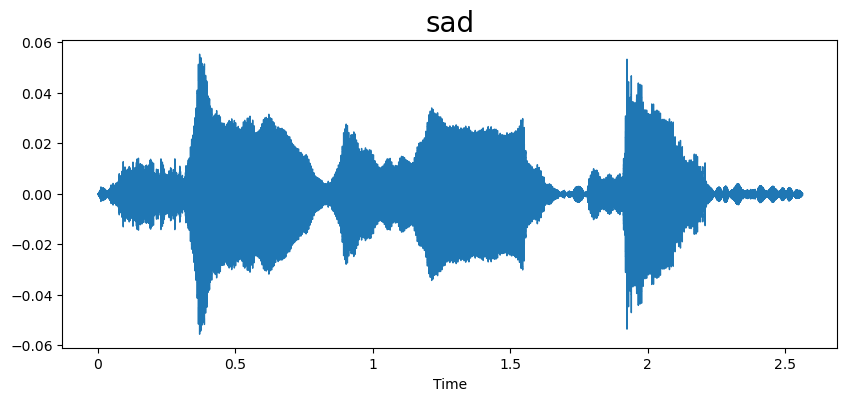

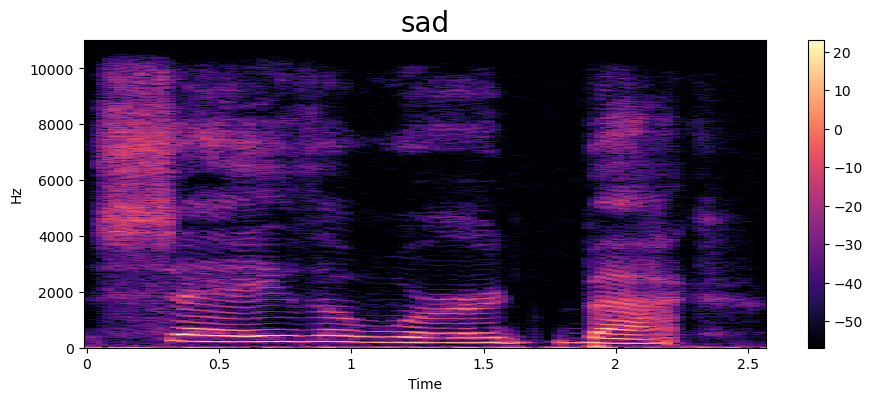

In [20]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


# Feature Extraction

In [21]:
def extract_mfcc(filename):
    y,sr= librosa.load(filename,duration = 3,offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc = 40).T,axis = 0)
    return mfcc

In [22]:
extract_mfcc(df['speech'][0])

array([-3.9791479e+02,  7.8756226e+01, -2.0911753e+01, -2.0349020e+01,
       -3.4199820e+00,  1.1357657e+01, -2.1622475e+01, -4.8617830e+00,
       -8.4185266e+00,  6.2100190e-01, -2.9795790e+00,  1.3149230e+00,
       -3.4300986e-01,  2.3402820e+00,  1.9168798e+00,  3.7745941e+00,
       -5.5863881e+00, -3.6113353e+00, -2.3929298e+00, -9.5256548e+00,
       -8.2061357e+00, -1.2038864e+00, -7.5688171e+00,  9.9129772e+00,
        7.9321532e+00,  2.2083347e+01,  1.8905153e+01,  2.0599804e+01,
        1.3219537e+01,  8.4827614e+00,  3.0294436e-01,  5.1541729e+00,
        9.5726032e+00,  5.4089761e+00,  2.6034532e+00, -1.9647242e+00,
        5.0509210e+00,  9.0977497e+00,  2.3394349e+00, -2.1917243e+00],
      dtype=float32)

In [23]:
x_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))
x_mfcc

0       [-397.9148, 78.756226, -20.911753, -20.34902, ...
1       [-466.53455, 99.911064, -0.480273, -31.616299,...
2       [-431.5178, 48.56504, -0.8924488, 2.2234004, 0...
3       [-405.01205, 78.51893, -14.72178, -20.10229, -...
4       [-435.3804, 79.39025, 8.873596, 18.061926, 6.0...
                              ...                        
1395    [-554.5794, 91.78299, 25.282017, 18.345247, 17...
1396    [-590.1003, 97.41461, 35.74892, 16.209633, 27....
1397    [-535.2709, 88.06032, 25.163685, 21.924896, 19...
1398    [-549.7413, 111.764175, 30.308115, 14.165436, ...
1399    [-550.9464, 104.709015, 29.937454, 28.579796, ...
Name: speech, Length: 1400, dtype: object

In [24]:
x = [x for x in x_mfcc]
x = np.array(x)
x.shape

(1400, 40)

In [25]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
y = one.fit_transform(df[['label']])
y = y.toarray()
y.shape

(1400, 7)

# Create the MLP Model

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3,random_state = 0)

In [27]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(alpha = 0.01,batch_size = 256,hidden_layer_sizes = (300),learning_rate = 'adaptive',max_iter = 500)
model.fit(x_train,y_train)
pred = model.predict(x_test)


In [46]:
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix,precision_score

print('accuracy_score: ',accuracy_score(pred,y_test)*100)

print('.....................classification_report.............................')
print(classification_report(pred,y_test))

print('......................multilabel_confusion_matrix...................')
print('''
angry
disgust  
fear      
happy    
neutral   
ps         
sad

''')
ml = print(multilabel_confusion_matrix(pred,y_test))


accuracy_score:  99.28571428571429
.....................classification_report.............................
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.98      1.00      0.99        51
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        60
           5       0.98      1.00      0.99        52
           6       1.00      1.00      1.00        68

   micro avg       0.99      1.00      1.00       417
   macro avg       0.99      1.00      1.00       417
weighted avg       0.99      1.00      1.00       417
 samples avg       0.99      0.99      0.99       417

......................multilabel_confusion_matrix...................

angry
disgust  
fear      
happy    
neutral   
ps         
sad


[[[362   1]
  [  0  57]]

 [[368   1]
  [  0  51]]

 [[345   0]
  [  0  75]]

 [[366   0]
  [  0  54]]

 [